#### From HOML Chapter 2 – End-to-end Machine Learning project

*predict median house values in Californian districts, given a number of features from these districts.*



Load data save as np array

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline

In [62]:
housing_data = pd.read_csv("datasets/housing/housing_train.csv")

In [63]:
housing = housing_data.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = housing_data["median_house_value"].copy()

In [64]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


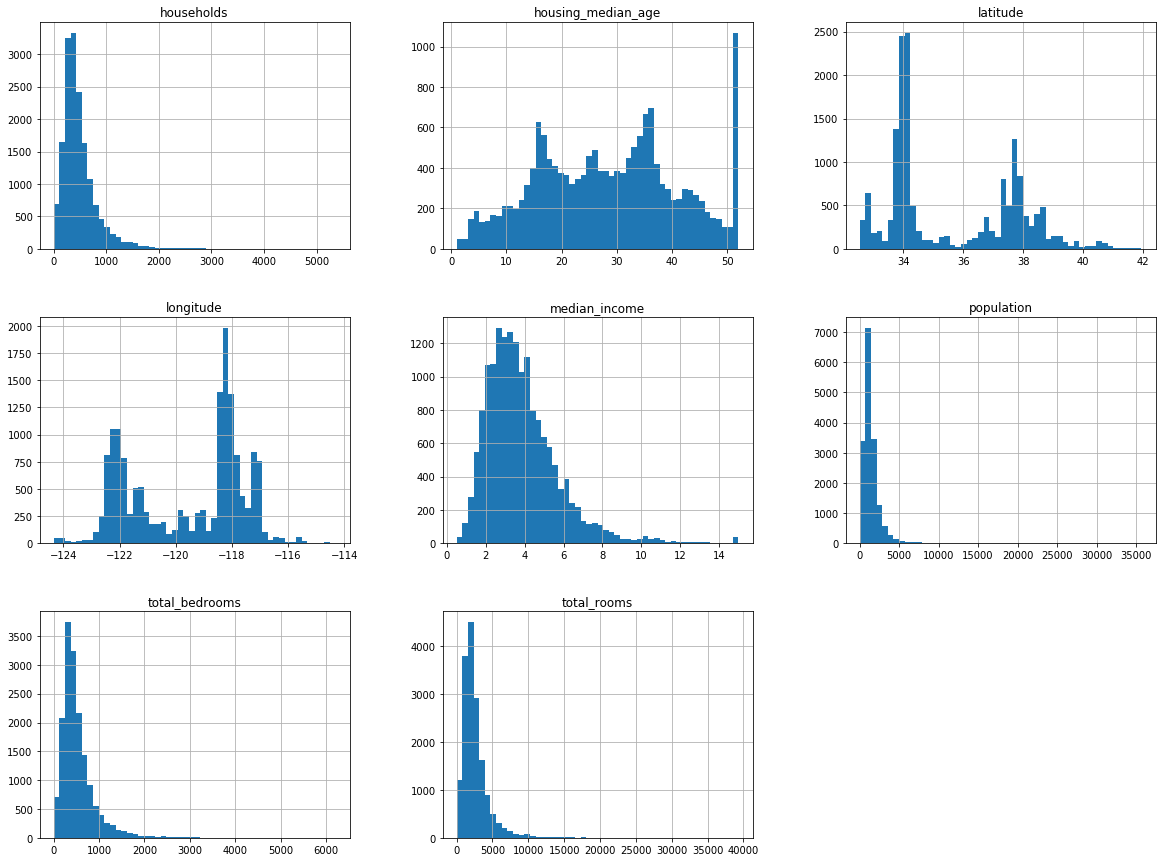

In [65]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

housing_num = housing.head().drop('ocean_proximity', axis=1)
num_attribs = list(housing_num)
pprint(num_attribs)
cat_attribs = ["ocean_proximity"]

# Replace any missing values with the median value
# Nomalize all the data
# This is all done on the numeric data so:
# housing_num = housing.drop('ocean_proximity', axis=1)
# num_attribs = list(housing_num)


num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('nomalize', MinMaxScaler()),
    ])


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']


In [67]:
housing_prepared = full_pipeline.fit_transform(housing)

In [68]:
housing_prepared

array([[0.24501992, 0.50478215, 0.7254902 , ..., 0.        , 0.        ,
        0.        ],
       [0.24103586, 0.47927736, 0.25490196, ..., 0.        , 0.        ,
        0.        ],
       [0.71215139, 0.02444208, 0.58823529, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.79183267, 0.16471838, 0.15686275, ..., 0.        , 0.        ,
        0.        ],
       [0.6314741 , 0.1360255 , 0.58823529, ..., 0.        , 0.        ,
        0.        ],
       [0.18924303, 0.55579171, 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [69]:
np.shape(housing_prepared)

(16512, 13)

In [70]:
np.savetxt("datasets/housing/housing_train_array.csv", housing_prepared, delimiter=",")

In [71]:
np.savetxt("datasets/housing/housing_train_target_array.csv", housing_labels, delimiter=",")